# Análise dos Fatores Condicionantes das Ocorrências no Brasil

##Bibliotecas e Montagem do drive

In [0]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(15,10)})

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Importando Ocorrências Brasil

In [0]:
df_ocorrencias = pd.read_csv('gdrive/My Drive/projetos/lp/oco.csv', sep='~', header=0,usecols=['codigo_ocorrencia', 'ocorrencia_uf', 'ocorrencia_dia'])

#Substituindo dia da ocorrência para mês
df_ocorrencias['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias.ocorrencia_dia)
df_ocorrencias['mes'] = df_ocorrencias['ocorrencia_dia'].dt.strftime('%Y-%m')
df_ocorrencias.drop('ocorrencia_dia', axis=1, inplace=True)


df_ocorrencias_brasil = df_ocorrencias

print(df_ocorrencias_brasil.shape)
df_ocorrencias_brasil.head()

(5733, 3)


,codigo_ocorrencia,ocorrencia_uf,mes
0,201305055424986,RO,2013-05
1,201805021421302,RO,2018-03
2,201605160250139,RO,2016-05
3,201311259977425,RO,2013-11
4,200808073991179,RO,2008-08


##Tabela todos os meses da amostra

In [0]:
df_tabela_mes = df_ocorrencias.groupby('mes').size().reset_index(name='Quantidade')

df_meses = pd.DataFrame(df_tabela_mes['mes'])

print(df_meses.shape)
df_meses.head()

(133, 1)


,mes
0,2008-01
1,2008-02
2,2008-03
3,2008-04
4,2008-05


##Teste Hipóteses (Condições Metereológicas)

**H0:** As condições meteorológicas não influenciam nas ocorrências aeronáuticas civis analisadas pelo CENIPA no Brasil.

**H1:** As condições meteorológicas influenciam nas ocorrências aeronáuticas civis analisadas pelo CENIPA no Brasil.

###Importando Fatores Contribuintes

In [0]:
df_fatores_contribuintes = pd.read_csv('gdrive/My Drive/projetos/lp/ftc.csv', sep='~', header=0, usecols=['codigo_ocorrencia', 'fator_nome'])

print(df_fatores_contribuintes.shape)
df_fatores_contribuintes.head()

(4800, 2)


,codigo_ocorrencia,fator_nome
0,200801041545367,INDISCIPLINA DE VOO
1,200801041545367,INSTRUÇÃO
2,200801041545367,MANUTENÇÃO DE AERONAVE
3,200801041545367,OUTRO FATOR
4,200801058203864,JULGAMENTO DE PILOTAGEM


###Merge das ocorrências com fatores contribuintes

In [0]:
df_ocorrencias_fatores = pd.merge(df_ocorrencias_brasil, df_fatores_contribuintes, on='codigo_ocorrencia')


print(df_ocorrencias_fatores.shape)
df_ocorrencias_fatores.head()

(4799, 4)


,codigo_ocorrencia,ocorrencia_uf,mes,fator_nome
0,201311259977425,RO,2013-11,COORDENAÇÃO DE CABINE
1,201311259977425,RO,2013-11,ESQUECIMENTO DO PILOTO
2,200808073991179,RO,2008-08,JULGAMENTO DE PILOTAGEM
3,200808073991179,RO,2008-08,INDISCIPLINA DE VOO
4,200808073991179,RO,2008-08,MANUTENÇÃO DE AERONAVE


###Distribuição de eventos mensais (incluindo condições metereológicas)

133
[56, 50, 28, 55, 19, 13, 57, 21, 40, 33, 58, 82, 52, 45, 50, 47, 55, 14, 60, 19, 65, 54, 41, 69, 73, 48, 29, 64, 73, 35, 64, 38, 60, 38, 37, 65, 85, 42, 38, 39, 56, 52, 71, 77, 48, 79, 47, 39, 50, 80, 24, 51, 30, 27, 38, 61, 29, 12, 46, 40, 27, 39, 27, 35, 26, 39, 37, 37, 42, 75, 22, 55, 67, 44, 61, 60, 35, 46, 22, 50, 25, 27, 28, 37, 27, 44, 26, 27, 45, 42, 32, 26, 29, 21, 52, 39, 59, 23, 55, 42, 4, 8, 23, 6, 31, 17, 9, 31, 26, 26, 18, 19, 21, 9, 15, 14, 17, 15, 11, 8, 13, 11, 13, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0]


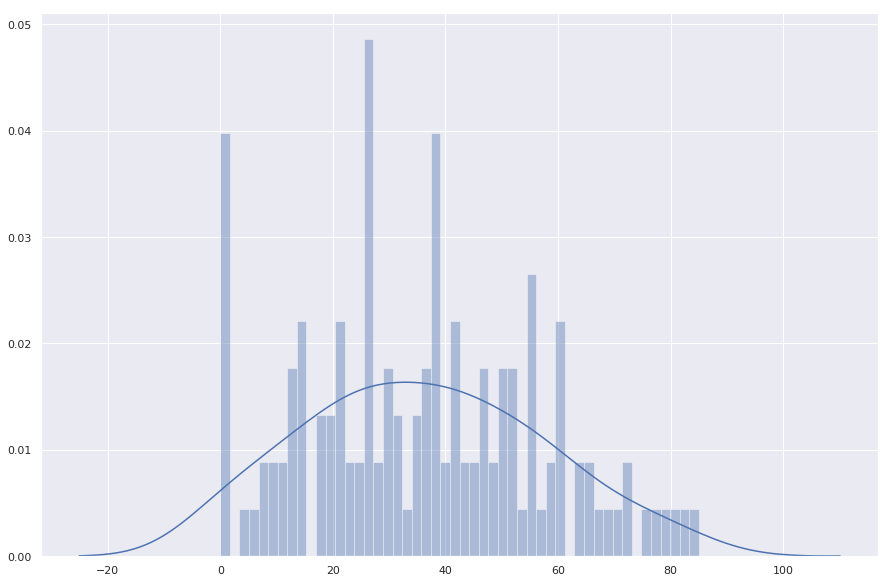

In [0]:
df_ocorrencias_fatores_agrupado = df_ocorrencias_fatores.groupby('mes').size().reset_index(name='Quantidade_Eventos')


#Merge para adicionar zeros nos meses que não tiveram eventos
df_ocorrencias_fatores_total = pd.merge(df_meses, df_ocorrencias_fatores_agrupado, on = 'mes', how = 'left')
df_ocorrencias_fatores_total['Quantidade_Eventos'].fillna(0, inplace = True)

lista_eventos_totais = pd.Series(df_ocorrencias_fatores_total['Quantidade_Eventos']).astype(int).tolist()

print(len(lista_eventos_totais))
print(lista_eventos_totais)

sns.distplot(lista_eventos_totais, bins=50, norm_hist=True)

###Distribuição de eventos mensais provocados por condições metereológicas

133
[3, 3, 1, 3, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 4, 1, 0, 1, 4, 1, 0, 2, 2, 4, 2, 1, 0, 1, 3, 1, 1, 0, 0, 3, 4, 0, 0, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 0, 2, 2, 0, 2, 1, 3, 1, 0, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


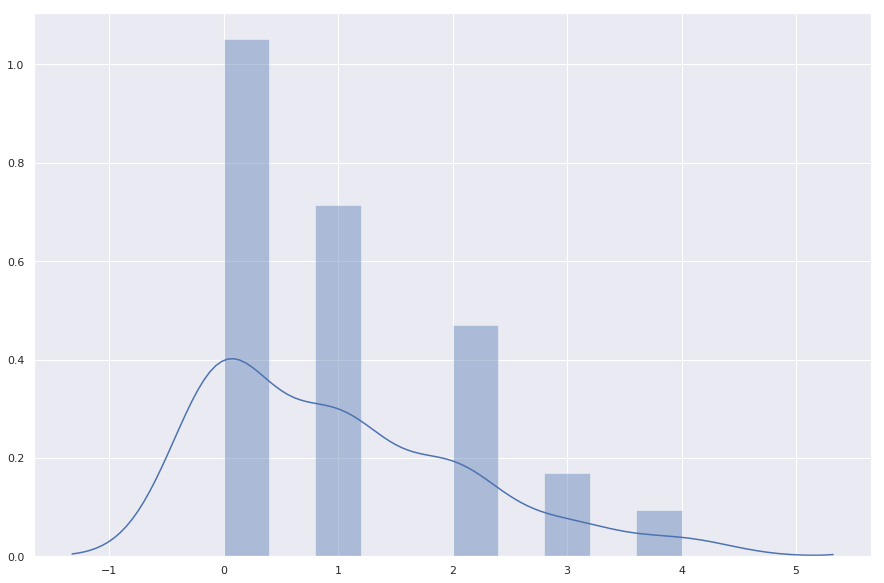

In [0]:
df_ocorrencias_fatores_eventos_totais = df_ocorrencias_fatores.groupby(['mes', 'fator_nome']).size().reset_index(name='Quantidade_Eventos')

#Tabela apenas com condições metereológicas
df_ocorrencias_fatores_eventos_apenas_cond_met = df_ocorrencias_fatores_eventos_totais.loc[df_ocorrencias_fatores_eventos_totais['fator_nome'] == 'CONDIÇÕES METEOROLÓGICAS ADVERSAS']

#Merge para adicionar zeros nos meses que não tiveram eventos
df_ocorrencias_fatores_eventos_cond_met = pd.merge(df_meses, df_ocorrencias_fatores_eventos_apenas_cond_met, on = 'mes', how = 'left')
df_ocorrencias_fatores_eventos_cond_met['Quantidade_Eventos'].fillna(0, inplace = True)

df_ocorrencias_fatores_eventos_cond_met = df_ocorrencias_fatores_eventos_cond_met.drop('fator_nome', axis=1)

lista_eventos_totais_cond_met = pd.Series(df_ocorrencias_fatores_eventos_cond_met['Quantidade_Eventos']).astype(int).tolist()

print(len(lista_eventos_totais_cond_met))
print(lista_eventos_totais_cond_met)

sns.distplot(lista_eventos_totais_cond_met, bins=10, norm_hist=True)

###Distribuição de eventos mensais retirando os provocados por condições metereológicas

133
[53, 47, 27, 52, 18, 13, 57, 20, 40, 33, 56, 80, 51, 45, 48, 47, 51, 13, 60, 18, 61, 53, 41, 67, 71, 44, 27, 63, 73, 34, 61, 37, 59, 38, 37, 62, 81, 42, 38, 38, 54, 51, 69, 76, 46, 76, 45, 37, 48, 78, 22, 48, 30, 25, 36, 61, 27, 11, 43, 39, 27, 35, 27, 34, 25, 38, 36, 36, 41, 74, 21, 54, 64, 44, 60, 58, 34, 44, 20, 49, 25, 27, 27, 37, 27, 42, 25, 25, 43, 42, 32, 26, 29, 21, 52, 37, 58, 23, 54, 40, 4, 8, 23, 6, 31, 17, 9, 31, 25, 26, 18, 19, 20, 8, 15, 14, 16, 14, 11, 8, 13, 11, 13, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0]


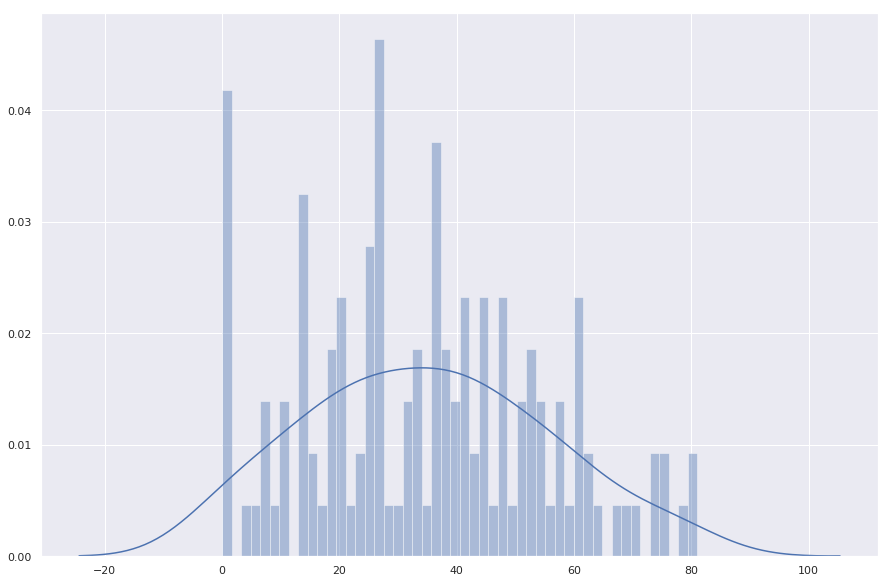

In [0]:
df_ocorrencias_fatores_total_sem_cond_meter = df_ocorrencias_fatores[df_ocorrencias_fatores['fator_nome'].isin(['CONDIÇÕES METEOROLÓGICAS ADVERSAS']) == False]

df_ocorrencias_fatores_total_sem_cond_meter_agrupado = df_ocorrencias_fatores_total_sem_cond_meter.groupby('mes').size().reset_index(name='Quantidade_Eventos')

# #Merge para adicionar zeros nos meses que não tiveram eventos
df_ocorrencias_fatores_total_sem_cond_meter_com_zeros = pd.merge(df_meses, df_ocorrencias_fatores_total_sem_cond_meter_agrupado, on = 'mes', how = 'left')
df_ocorrencias_fatores_total_sem_cond_meter_com_zeros['Quantidade_Eventos'].fillna(0, inplace = True)

lista_eventos_sem_cond_meter_total = pd.Series(df_ocorrencias_fatores_total_sem_cond_meter_com_zeros['Quantidade_Eventos']).astype(int).tolist()

print(len(lista_eventos_sem_cond_meter_total))
print(lista_eventos_sem_cond_meter_total)

sns.distplot(lista_eventos_sem_cond_meter_total, bins=50, norm_hist=True)

###T-test (eventos mensais sem condições metereológicas / eventos mensais provocados por condições metereológicas)

In [0]:
print(lista_eventos_sem_cond_meter_total)
print(lista_eventos_totais_cond_met)

stats.ttest_rel(lista_eventos_sem_cond_meter_total,lista_eventos_totais_cond_met)

[53, 47, 27, 52, 18, 13, 57, 20, 40, 33, 56, 80, 51, 45, 48, 47, 51, 13, 60, 18, 61, 53, 41, 67, 71, 44, 27, 63, 73, 34, 61, 37, 59, 38, 37, 62, 81, 42, 38, 38, 54, 51, 69, 76, 46, 76, 45, 37, 48, 78, 22, 48, 30, 25, 36, 61, 27, 11, 43, 39, 27, 35, 27, 34, 25, 38, 36, 36, 41, 74, 21, 54, 64, 44, 60, 58, 34, 44, 20, 49, 25, 27, 27, 37, 27, 42, 25, 25, 43, 42, 32, 26, 29, 21, 52, 37, 58, 23, 54, 40, 4, 8, 23, 6, 31, 17, 9, 31, 25, 26, 18, 19, 20, 8, 15, 14, 16, 14, 11, 8, 13, 11, 13, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 1, 3, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 4, 1, 0, 1, 4, 1, 0, 2, 2, 4, 2, 1, 0, 1, 3, 1, 1, 0, 0, 3, 4, 0, 0, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 0, 2, 2, 0, 2, 1, 3, 1, 0, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Ttest_relResult(statistic=19.78224861019999, pvalue=2.6372052222780984e-41)

###T-test (eventos mensais geral / eventos mensais provocados por condições metereológicas)

In [0]:
print(lista_eventos_totais)
print(lista_eventos_totais_cond_met)

stats.ttest_rel(lista_eventos_totais,lista_eventos_totais_cond_met)

[56, 50, 28, 55, 19, 13, 57, 21, 40, 33, 58, 82, 52, 45, 50, 47, 55, 14, 60, 19, 65, 54, 41, 69, 73, 48, 29, 64, 73, 35, 64, 38, 60, 38, 37, 65, 85, 42, 38, 39, 56, 52, 71, 77, 48, 79, 47, 39, 50, 80, 24, 51, 30, 27, 38, 61, 29, 12, 46, 40, 27, 39, 27, 35, 26, 39, 37, 37, 42, 75, 22, 55, 67, 44, 61, 60, 35, 46, 22, 50, 25, 27, 28, 37, 27, 44, 26, 27, 45, 42, 32, 26, 29, 21, 52, 39, 59, 23, 55, 42, 4, 8, 23, 6, 31, 17, 9, 31, 26, 26, 18, 19, 21, 9, 15, 14, 17, 15, 11, 8, 13, 11, 13, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 1, 3, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 4, 1, 0, 1, 4, 1, 0, 2, 2, 4, 2, 1, 0, 1, 3, 1, 1, 0, 0, 3, 4, 0, 0, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 0, 2, 2, 0, 2, 1, 3, 1, 0, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Ttest_relResult(statistic=19.826450458061405, pvalue=2.114334868678844e-41)

###T-test (eventos mensais geral / eventos mensais sem condições metereológicas)

[56, 50, 28, 55, 19, 13, 57, 21, 40, 33, 58, 82, 52, 45, 50, 47, 55, 14, 60, 19, 65, 54, 41, 69, 73, 48, 29, 64, 73, 35, 64, 38, 60, 38, 37, 65, 85, 42, 38, 39, 56, 52, 71, 77, 48, 79, 47, 39, 50, 80, 24, 51, 30, 27, 38, 61, 29, 12, 46, 40, 27, 39, 27, 35, 26, 39, 37, 37, 42, 75, 22, 55, 67, 44, 61, 60, 35, 46, 22, 50, 25, 27, 28, 37, 27, 44, 26, 27, 45, 42, 32, 26, 29, 21, 52, 39, 59, 23, 55, 42, 4, 8, 23, 6, 31, 17, 9, 31, 26, 26, 18, 19, 21, 9, 15, 14, 17, 15, 11, 8, 13, 11, 13, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[53, 47, 27, 52, 18, 13, 57, 20, 40, 33, 56, 80, 51, 45, 48, 47, 51, 13, 60, 18, 61, 53, 41, 67, 71, 44, 27, 63, 73, 34, 61, 37, 59, 38, 37, 62, 81, 42, 38, 38, 54, 51, 69, 76, 46, 76, 45, 37, 48, 78, 22, 48, 30, 25, 36, 61, 27, 11, 43, 39, 27, 35, 27, 34, 25, 38, 36, 36, 41, 74, 21, 54, 64, 44, 60, 58, 34, 44, 20, 49, 25, 27, 27, 37, 27, 42, 25, 25, 43, 42, 32, 26, 29, 21, 52, 37, 58, 23, 54, 40, 4, 8, 23, 6, 31, 17, 9, 31, 25, 26, 18, 19, 20, 8, 15, 14, 16, 14, 11, 8, 13, 11,

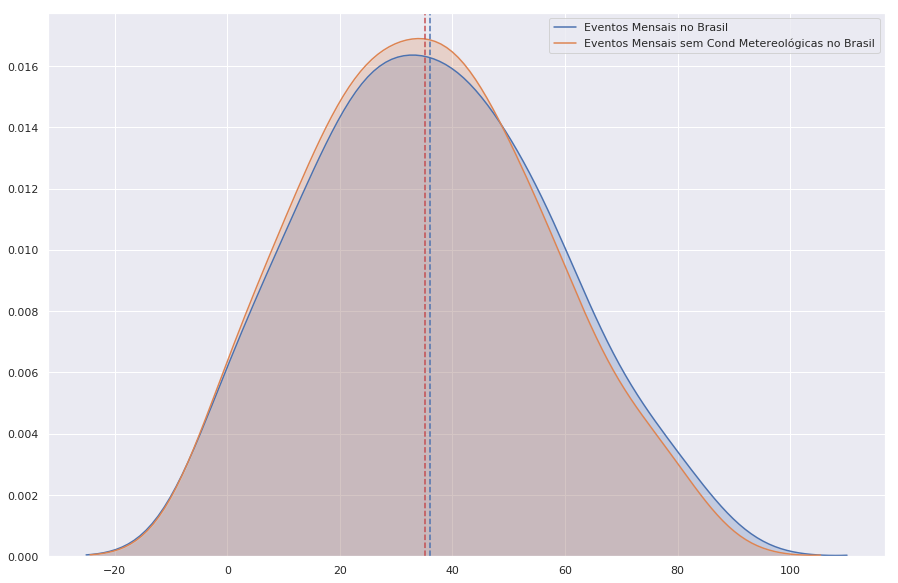

In [0]:
print(lista_eventos_totais)
print(lista_eventos_sem_cond_meter_total)

print(stats.mstats.ttest_ind(lista_eventos_totais,lista_eventos_sem_cond_meter_total))

sns.kdeplot(lista_eventos_totais, label='Eventos Mensais no Brasil', shade=True)
sns.kdeplot(lista_eventos_sem_cond_meter_total, label='Eventos Mensais sem Cond Metereológicas no Brasil', shade=True)

m = sum(lista_eventos_totais) / len(lista_eventos_totais)
plt.axvline(m, color="b", linestyle="--");

n = sum(lista_eventos_sem_cond_meter_total) / len(lista_eventos_sem_cond_meter_total)
plt.axvline(n, color="r", linestyle="--");

##Teste Hipóteses (Desempenho do Ser Humano)

**H0:** O desempenho do ser humano não influencia nas ocorrências aeronáuticas civis analisadas pelo CENIPA no Brasil.

**H1:** O desempenho do ser humano influencia nas ocorrências aeronáuticas civis analisadas pelo CENIPA no Brasil.

###Importando Fatores Aspecto

In [0]:
df_fator_aspecto = pd.read_csv('gdrive/My Drive/projetos/lp/ftc.csv', sep='~', header=0, usecols=['codigo_ocorrencia', 'fator_aspecto'])

print(df_fator_aspecto.shape)
df_fator_aspecto.head()

(4800, 2)


,codigo_ocorrencia,fator_aspecto
0,200801041545367,DESEMPENHO DO SER HUMANO
1,200801041545367,DESEMPENHO DO SER HUMANO
2,200801041545367,DESEMPENHO DO SER HUMANO
3,200801041545367,***
4,200801058203864,DESEMPENHO DO SER HUMANO


###Merge das ocorrências com fatores aspecto

In [0]:
df_ocorrencias_fatores_aspecto = pd.merge(df_ocorrencias_brasil, df_fator_aspecto, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_aspecto.shape)
df_ocorrencias_fatores_aspecto.head()

(4799, 4)


,codigo_ocorrencia,ocorrencia_uf,mes,fator_aspecto
0,201311259977425,RO,2013-11,DESEMPENHO DO SER HUMANO
1,201311259977425,RO,2013-11,DESEMPENHO DO SER HUMANO
2,200808073991179,RO,2008-08,DESEMPENHO DO SER HUMANO
3,200808073991179,RO,2008-08,DESEMPENHO DO SER HUMANO
4,200808073991179,RO,2008-08,DESEMPENHO DO SER HUMANO


###Distribuição de eventos mensais (incluindo desempenho humano)

133
[56, 50, 28, 55, 19, 13, 57, 21, 40, 33, 58, 82, 52, 45, 50, 47, 55, 14, 60, 19, 65, 54, 41, 69, 73, 48, 29, 64, 73, 35, 64, 38, 60, 38, 37, 65, 85, 42, 38, 39, 56, 52, 71, 77, 48, 79, 47, 39, 50, 80, 24, 51, 30, 27, 38, 61, 29, 12, 46, 40, 27, 39, 27, 35, 26, 39, 37, 37, 42, 75, 22, 55, 67, 44, 61, 60, 35, 46, 22, 50, 25, 27, 28, 37, 27, 44, 26, 27, 45, 42, 32, 26, 29, 21, 52, 39, 59, 23, 55, 42, 4, 8, 23, 6, 31, 17, 9, 31, 26, 26, 18, 19, 21, 9, 15, 14, 17, 15, 11, 8, 13, 11, 13, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0]


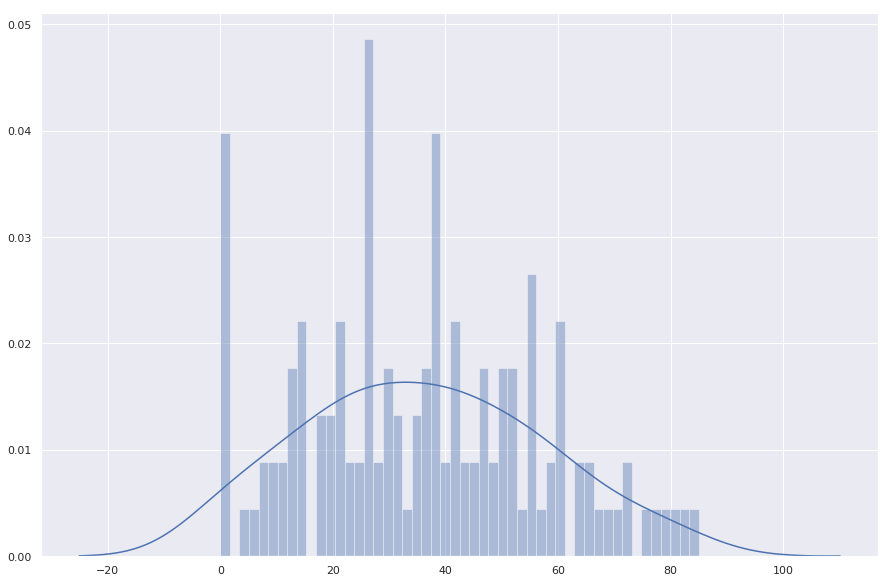

In [0]:
df_ocorrencias_fatores_aspecto_total_agrupado = df_ocorrencias_fatores_aspecto.groupby('mes').size().reset_index(name='Quantidade_Eventos')

#Merge para adicionar zeros nos meses que não tiveram eventos
df_ocorrencias_fatores_aspecto_total = pd.merge(df_meses, df_ocorrencias_fatores_aspecto_total_agrupado, on = 'mes', how = 'left')
df_ocorrencias_fatores_aspecto_total['Quantidade_Eventos'].fillna(0, inplace = True)

lista_eventos_totais = pd.Series(df_ocorrencias_fatores_aspecto_total['Quantidade_Eventos']).astype(int).tolist()

print(len(lista_eventos_totais))
print(lista_eventos_totais)

sns.distplot(lista_eventos_totais, bins=50, norm_hist=True)

###Distribuição de eventos mensais provocados por desempenho ser humano

133
[36, 23, 14, 29, 11, 10, 44, 14, 26, 27, 38, 51, 38, 29, 36, 29, 30, 11, 29, 15, 36, 33, 30, 40, 42, 26, 26, 38, 35, 30, 42, 18, 40, 28, 25, 38, 42, 28, 29, 29, 26, 26, 35, 44, 31, 42, 31, 27, 29, 43, 17, 31, 23, 21, 24, 44, 22, 11, 22, 22, 16, 20, 15, 19, 21, 24, 29, 22, 27, 46, 16, 35, 44, 27, 42, 32, 21, 28, 18, 26, 17, 20, 16, 28, 18, 33, 17, 18, 29, 22, 23, 19, 13, 11, 27, 22, 36, 11, 31, 28, 2, 5, 14, 4, 21, 13, 6, 19, 11, 20, 13, 13, 9, 4, 7, 8, 11, 8, 3, 4, 9, 10, 8, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0]


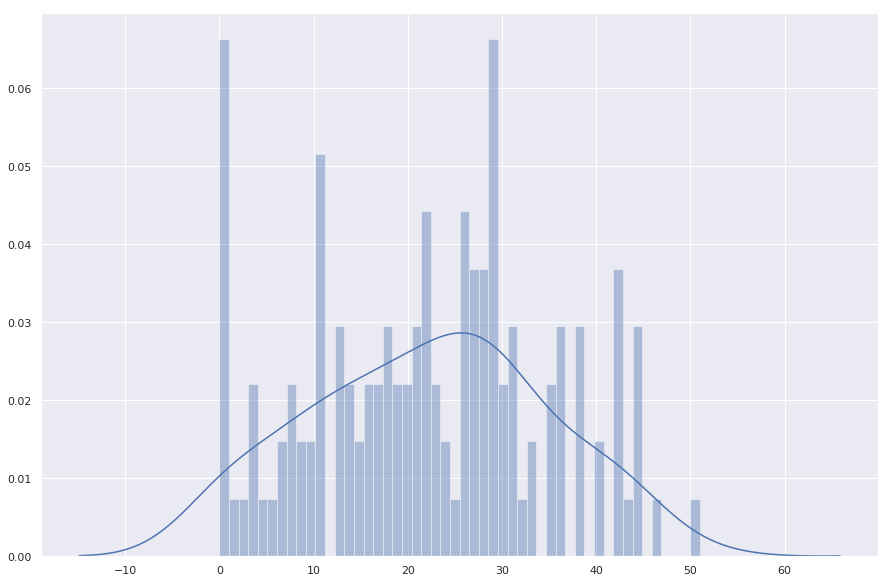

In [0]:
df_ocorrencias_fatores_aspecto_eventos_totais = df_ocorrencias_fatores_aspecto.groupby(['mes', 'fator_aspecto']).size().reset_index(name='Quantidade_Eventos')

df_ocorrencias_fatores_aspecto_humano_agrupado = df_ocorrencias_fatores_aspecto_eventos_totais.loc[df_ocorrencias_fatores_aspecto_eventos_totais['fator_aspecto'] == 'DESEMPENHO DO SER HUMANO']

#Merge para adicionar zeros nos meses que não tiveram eventos
df_ocorrencias_fatores_aspecto_humano = pd.merge(df_meses, df_ocorrencias_fatores_aspecto_humano_agrupado, on = 'mes', how = 'left')
df_ocorrencias_fatores_aspecto_humano['Quantidade_Eventos'].fillna(0, inplace = True)

lista_eventos_totais_asp_humano = pd.Series(df_ocorrencias_fatores_aspecto_humano['Quantidade_Eventos']).astype(int).tolist()

print(len(lista_eventos_totais_asp_humano))
print(lista_eventos_totais_asp_humano)

sns.distplot(lista_eventos_totais_asp_humano, bins=50, norm_hist=True)

###Distribuição de eventos mensais retirando os provocados por desempenho humano

133
[20, 27, 14, 26, 8, 3, 13, 7, 14, 6, 20, 31, 14, 16, 14, 18, 25, 3, 31, 4, 29, 21, 11, 29, 31, 22, 3, 26, 38, 5, 22, 20, 20, 10, 12, 27, 43, 14, 9, 10, 30, 26, 36, 33, 17, 37, 16, 12, 21, 37, 7, 20, 7, 6, 14, 17, 7, 1, 24, 18, 11, 19, 12, 16, 5, 15, 8, 15, 15, 29, 6, 20, 23, 17, 19, 28, 14, 18, 4, 24, 8, 7, 12, 9, 9, 11, 9, 9, 16, 20, 9, 7, 16, 10, 25, 17, 23, 12, 24, 14, 2, 3, 9, 2, 10, 4, 3, 12, 15, 6, 5, 6, 12, 5, 8, 6, 6, 7, 8, 4, 4, 1, 5, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0]


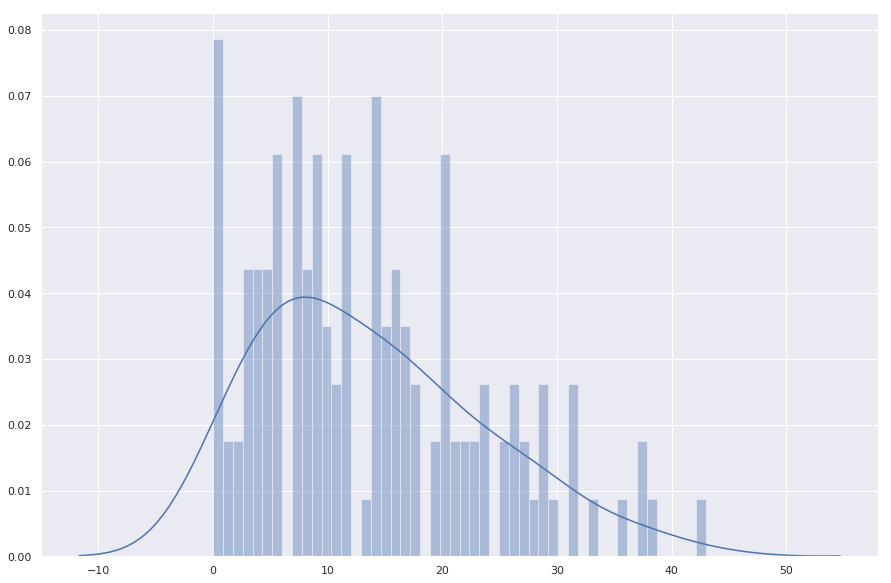

In [0]:
df_ocorrencias_fatores_totais_sem_desemp_hum = df_ocorrencias_fatores_aspecto[df_ocorrencias_fatores_aspecto['fator_aspecto'].isin(['DESEMPENHO DO SER HUMANO']) == False]

df_ocorrencias_fatores_totais_sem_desemp_hum_agrupado = df_ocorrencias_fatores_totais_sem_desemp_hum.groupby('mes').size().reset_index(name='Quantidade_Eventos')

# #Merge para adicionar zeros nos meses que não tiveram eventos
df_ocorrencias_fatores_totais_sem_desemp_hum_com_zeros = pd.merge(df_meses, df_ocorrencias_fatores_totais_sem_desemp_hum_agrupado, on = 'mes', how = 'left')
df_ocorrencias_fatores_totais_sem_desemp_hum_com_zeros['Quantidade_Eventos'].fillna(0, inplace = True)

lista_eventos_sem_desemp_hum_total = pd.Series(df_ocorrencias_fatores_totais_sem_desemp_hum_com_zeros['Quantidade_Eventos']).astype(int).tolist()

print(len(lista_eventos_sem_desemp_hum_total))
print(lista_eventos_sem_desemp_hum_total)

sns.distplot(lista_eventos_sem_desemp_hum_total, bins=50, norm_hist=True)

###T-test (eventos mensais sem desempenho humano / eventos mensais provocados por desempenho humano)

In [0]:
print(lista_eventos_sem_desemp_hum_total)
print(lista_eventos_totais_asp_humano)

stats.ttest_rel(lista_eventos_sem_desemp_hum_total,lista_eventos_totais_asp_humano)

[20, 27, 14, 26, 8, 3, 13, 7, 14, 6, 20, 31, 14, 16, 14, 18, 25, 3, 31, 4, 29, 21, 11, 29, 31, 22, 3, 26, 38, 5, 22, 20, 20, 10, 12, 27, 43, 14, 9, 10, 30, 26, 36, 33, 17, 37, 16, 12, 21, 37, 7, 20, 7, 6, 14, 17, 7, 1, 24, 18, 11, 19, 12, 16, 5, 15, 8, 15, 15, 29, 6, 20, 23, 17, 19, 28, 14, 18, 4, 24, 8, 7, 12, 9, 9, 11, 9, 9, 16, 20, 9, 7, 16, 10, 25, 17, 23, 12, 24, 14, 2, 3, 9, 2, 10, 4, 3, 12, 15, 6, 5, 6, 12, 5, 8, 6, 6, 7, 8, 4, 4, 1, 5, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[36, 23, 14, 29, 11, 10, 44, 14, 26, 27, 38, 51, 38, 29, 36, 29, 30, 11, 29, 15, 36, 33, 30, 40, 42, 26, 26, 38, 35, 30, 42, 18, 40, 28, 25, 38, 42, 28, 29, 29, 26, 26, 35, 44, 31, 42, 31, 27, 29, 43, 17, 31, 23, 21, 24, 44, 22, 11, 22, 22, 16, 20, 15, 19, 21, 24, 29, 22, 27, 46, 16, 35, 44, 27, 42, 32, 21, 28, 18, 26, 17, 20, 16, 28, 18, 33, 17, 18, 29, 22, 23, 19, 13, 11, 27, 22, 36, 11, 31, 28, 2, 5, 14, 4, 21, 13, 6, 19, 11, 20, 13, 13, 9, 4, 7, 8, 11, 8, 3, 4, 9, 10, 8, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Ttest_relResult(statistic=-12.412359501244108, pvalue=6.3608596149030985e-24)

###T-test (eventos mensais geral / eventos mensais provocados por desempenho humano)

In [0]:
print(lista_eventos_totais)
print(lista_eventos_totais_asp_humano)

stats.ttest_rel(lista_eventos_totais,lista_eventos_totais_asp_humano)

[56, 50, 28, 55, 19, 13, 57, 21, 40, 33, 58, 82, 52, 45, 50, 47, 55, 14, 60, 19, 65, 54, 41, 69, 73, 48, 29, 64, 73, 35, 64, 38, 60, 38, 37, 65, 85, 42, 38, 39, 56, 52, 71, 77, 48, 79, 47, 39, 50, 80, 24, 51, 30, 27, 38, 61, 29, 12, 46, 40, 27, 39, 27, 35, 26, 39, 37, 37, 42, 75, 22, 55, 67, 44, 61, 60, 35, 46, 22, 50, 25, 27, 28, 37, 27, 44, 26, 27, 45, 42, 32, 26, 29, 21, 52, 39, 59, 23, 55, 42, 4, 8, 23, 6, 31, 17, 9, 31, 26, 26, 18, 19, 21, 9, 15, 14, 17, 15, 11, 8, 13, 11, 13, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[36, 23, 14, 29, 11, 10, 44, 14, 26, 27, 38, 51, 38, 29, 36, 29, 30, 11, 29, 15, 36, 33, 30, 40, 42, 26, 26, 38, 35, 30, 42, 18, 40, 28, 25, 38, 42, 28, 29, 29, 26, 26, 35, 44, 31, 42, 31, 27, 29, 43, 17, 31, 23, 21, 24, 44, 22, 11, 22, 22, 16, 20, 15, 19, 21, 24, 29, 22, 27, 46, 16, 35, 44, 27, 42, 32, 21, 28, 18, 26, 17, 20, 16, 28, 18, 33, 17, 18, 29, 22, 23, 19, 13, 11, 27, 22, 36, 11, 31, 28, 2, 5, 14, 4, 21, 13, 6, 19, 11, 20, 13, 13, 9, 4, 7, 8, 11, 8, 3, 4, 9, 10, 8, 7,

Ttest_relResult(statistic=16.281510589605954, pvalue=2.2822466150461848e-33)

###T-test (eventos mensais geral / eventos mensais sem desempenho humano

[56, 50, 28, 55, 19, 13, 57, 21, 40, 33, 58, 82, 52, 45, 50, 47, 55, 14, 60, 19, 65, 54, 41, 69, 73, 48, 29, 64, 73, 35, 64, 38, 60, 38, 37, 65, 85, 42, 38, 39, 56, 52, 71, 77, 48, 79, 47, 39, 50, 80, 24, 51, 30, 27, 38, 61, 29, 12, 46, 40, 27, 39, 27, 35, 26, 39, 37, 37, 42, 75, 22, 55, 67, 44, 61, 60, 35, 46, 22, 50, 25, 27, 28, 37, 27, 44, 26, 27, 45, 42, 32, 26, 29, 21, 52, 39, 59, 23, 55, 42, 4, 8, 23, 6, 31, 17, 9, 31, 26, 26, 18, 19, 21, 9, 15, 14, 17, 15, 11, 8, 13, 11, 13, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[20, 27, 14, 26, 8, 3, 13, 7, 14, 6, 20, 31, 14, 16, 14, 18, 25, 3, 31, 4, 29, 21, 11, 29, 31, 22, 3, 26, 38, 5, 22, 20, 20, 10, 12, 27, 43, 14, 9, 10, 30, 26, 36, 33, 17, 37, 16, 12, 21, 37, 7, 20, 7, 6, 14, 17, 7, 1, 24, 18, 11, 19, 12, 16, 5, 15, 8, 15, 15, 29, 6, 20, 23, 17, 19, 28, 14, 18, 4, 24, 8, 7, 12, 9, 9, 11, 9, 9, 16, 20, 9, 7, 16, 10, 25, 17, 23, 12, 24, 14, 2, 3, 9, 2, 10, 4, 3, 12, 15, 6, 5, 6, 12, 5, 8, 6, 6, 7, 8, 4, 4, 1, 5, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ttes

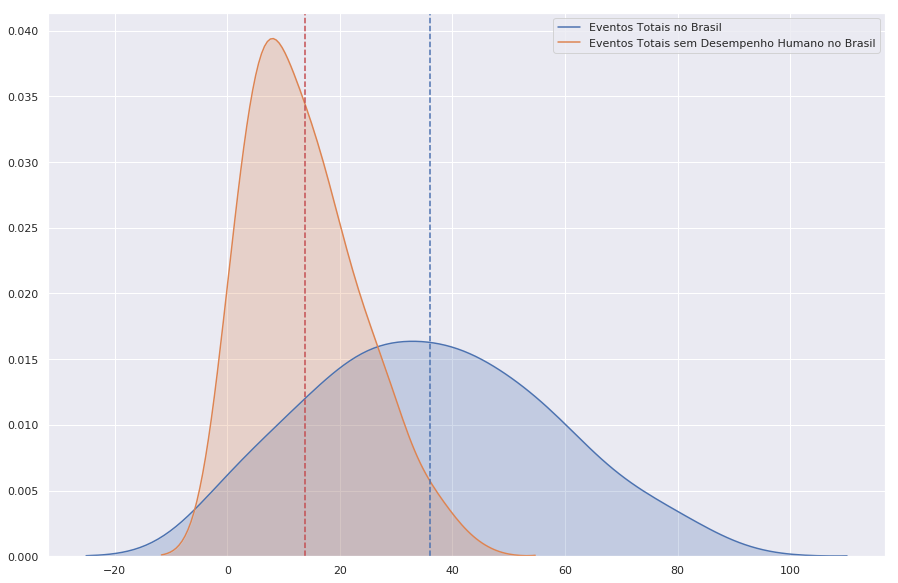

In [0]:
print(lista_eventos_totais)
print(lista_eventos_sem_desemp_hum_total)

print(stats.ttest_ind(lista_eventos_totais,lista_eventos_sem_desemp_hum_total))

sns.kdeplot(lista_eventos_totais, label='Eventos Totais no Brasil', shade=True)
sns.kdeplot(lista_eventos_sem_desemp_hum_total, label='Eventos Totais sem Desempenho Humano no Brasil', shade=True)

a = sum(lista_eventos_totais) / len(lista_eventos_totais)
plt.axvline(a, color="b", linestyle="--");

z = sum(lista_eventos_sem_desemp_hum_total) / len(lista_eventos_sem_desemp_hum_total)
plt.axvline(z, color="r", linestyle="--");